In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
from tqdm import tqdm
from pathlib import Path
from uco.data_loader import pivot_df

In [86]:
df = pd.read_csv('../data/predictions/log.csv')
df.sort_values('mean_dice', ascending=False, inplace=True)
df.head(200)

,mean_dice,encoder,decoder,dropout,augs,img_height,img_width,batch_size,bce_weight,dice_weight,encoder_lr,decoder_lr,seed
27,0.617239,efficientnet-b2,Unet,0.20,HeavyResizeTransforms,320,480,16,0.7,0.3,0.00007,0.0030,2985467
10,0.616519,efficientnet-b2,Unet,0.20,HeavyResizeTransforms,320,480,16,0.7,0.3,0.00005,0.0030,19895904
8,0.610691,efficientnet-b2,Unet,0.20,HeavyResizeTransforms,320,480,16,0.7,0.3,0.00005,0.0030,14940844
9,0.610067,efficientnet-b2,Unet,0.20,HeavyResizeTransforms,320,480,16,0.7,0.3,0.00005,0.0030,3301594
5,0.609231,efficientnet-b0,FPN,0.15,HeavyResizeTransforms,384,576,16,0.8,0.2,0.00005,0.0010,380035
6,0.607168,efficientnet-b2,FPN,0.20,HeavyResizeTransforms,256,384,28,0.5,0.5,0.00007,0.0009,12661710
0,0.605806,inceptionresnetv2,Unet,0.20,HeavyResizeTransforms,192,228,40,0.6,0.4,0.00007,0.0030,3320
28,0.604850,efficientnet-b2,Unet,0.15,HeavyResizeTransforms,320,480,16,0.7,0.3,0.00003,0.0030,7452229
7,0.602143,efficientnet-b2,Unet,0.10,HeavyResizeTransforms,320,480,24,0.8,0.2,0.00005,0.0020,12145
26,0.601649,efficientnet-b2,Unet,0.20,HeavyResizeRandomCropTransforms,320,480,16,0.8,0.2,0.00007,0.0020,3366


In [4]:
H = 350
W = 525
C = 4
N = 3698

In [81]:
with h5py.File('../data/predictions/raw-predictions.h5', 'r') as f:
    key_count = 0
    for k in f.keys():
        print(k)
        key_count += 1
        # p = f[k][0, :, :, :] / 100
        # print(p.shape)
print(key_count)

1031-205153
1101-090708
1101-124311
1101-131548
1101-142448
1101-174844
1101-235739
7


In [6]:
def read(f):
    path = Path('../data/raw/test_images') / f
    img = cv2.imread(str(path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

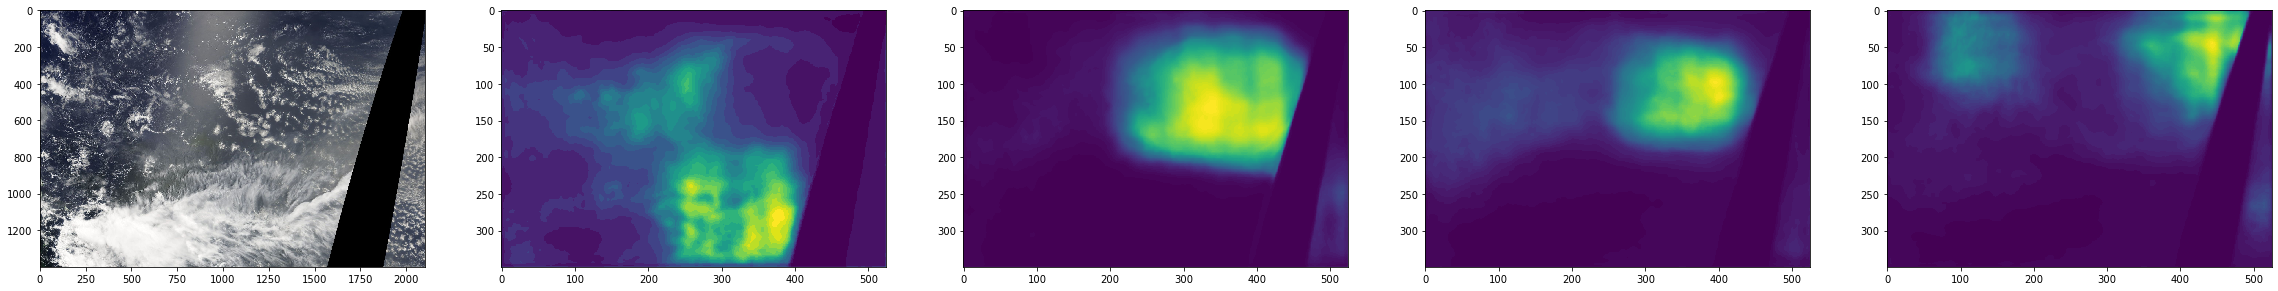

In [83]:
df = pd.read_csv('../data/raw/sample_submission.csv')
idx = 189
with h5py.File('../data/predictions/raw-predictions.h5', 'r') as f:
    p = f['1101-142448'][idx, :, :, :]
img_filename = df.iloc[idx * 4]['Image_Label'].split('_')[0]
img = read(img_filename)
fig, axs = plt.subplots(1, 5, figsize=(40, 12))
axs[0].imshow(img)
axs[1].imshow(p[0, :, :])
axs[2].imshow(p[1, :, :])
axs[3].imshow(p[2, :, :])
axs[4].imshow(p[3, :, :])
plt.show()

In [43]:
p[2, :, :].mean()

0.8300725

In [5]:
?experiments

In [17]:
preds.shape

(5, 4, 350, 525)

In [18]:
preds

array([[[[67, 77, 57, ..., 17,  4, 20],
         [98, 54, 58, ...,  5, 38,  0],
         [28, 92, 60, ..., 65, 61, 12],
         ...,
         [75, 17,  9, ..., 47, 84, 82],
         [27, 26, 60, ..., 72, 34, 71],
         [40, 29, 56, ...,  0, 31, 39]],

        [[85, 85, 17, ..., 38, 69, 76],
         [67, 27, 74, ..., 88, 86, 36],
         [21,  2, 47, ..., 65, 73, 94],
         ...,
         [16, 32, 89, ..., 24, 42, 53],
         [72, 76,  3, ..., 55,  2, 67],
         [ 5, 39, 57, ...,  4, 18, 41]],

        [[ 6, 38, 30, ..., 51, 84,  8],
         [87, 75, 11, ...,  4, 84, 72],
         [27, 11, 71, ..., 11, 64, 26],
         ...,
         [38,  3, 94, ..., 70, 32, 64],
         [23, 15, 30, ..., 84, 86, 63],
         [20, 79, 77, ..., 45, 94,  2]],

        [[48,  8, 42, ..., 79, 11, 83],
         [46, 40, 38, ..., 49,  9, 25],
         [34, 46, 35, ..., 95, 36, 18],
         ...,
         [53, 80,  8, ..., 42, 78, 53],
         [31, 64, 31, ..., 42, 87, 38],
         [95, 30, 

In [7]:
len(experiments)

TypeError: Not a location id (invalid object ID)